<a href="https://colab.research.google.com/github/PTrillat/Reinforcement-Learning/blob/main/Pendule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

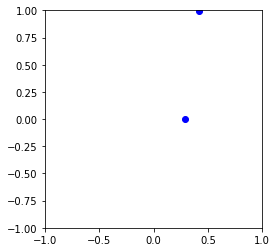

In [26]:
import numpy as np
import numpy.random as random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Pendule(object):
    def __init__(self, µ, γ, x, dx, θ, dθ):
        self.const = (µ, γ)
        self.X  = np.array([x, dx])
        self.dX = np.array([θ, dθ])
    
    @staticmethod
    def ddX(const, X, dX, F):
      µ, γ = const
      x, θ = X
      dx, dθ = dX
      s, c = np.sin(θ), np.cos(θ)
      det = µ + s*s
      ddx = s*(   dθ*dθ    -c*γ)+F
      ddθ = s*(-c*dθ*dθ+(µ+1)*γ)-F*c
      return np.array([ddx, ddθ]) / det
    
    def Simpson(self, h, F=0.0):
      # f(x, dx) = (dx, ddx(x, dx))
      X0 = self.X
      dX0 = self.dX
      ddX0 = self.ddX(self.const, X0, dX0, F)
      X1 = X0 + h/2*dX0
      dX1 = dX0 + h/2*ddX0
      ddX1 = self.ddX(self.const, X1, dX1, F)
      X2 = X0 + h/2*dX1
      dX2 = dX0 + h/2*ddX1
      ddX2 = self.ddX(self.const, X2, dX2, F)
      X3 = X0 + h*dX2
      dX3 = dX0 + h*dX2
      ddX3 = self.ddX(self.const, X3, dX3, F)
      self.X  += h/6*( dX0 +  2*dX1 +  2*dX2 +  dX3)
      self.dX += h/6*(ddX0 + 2*ddX1 + 2*ddX2 + ddX3)


pendule = Pendule(0.0, 1.0, 0.0, 0.1, np.pi, 0.0)

fig = plt.figure() # initialise la figure
plt.axis('square')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
line, = plt.plot([], [], 'bo')

def animate(i):
    pendule.Simpson(0.1)
    x, θ = pendule.X
    line.set_data([x, x+np.sin(θ)], [0, np.cos(θ)])
    return line,
 
ani = animation.FuncAnimation(fig, animate, frames=1, blit=True, interval=20, repeat=False)

from matplotlib import rc
rc('animation', html='html5')

In [27]:
ani

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in sin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in cos
